# Objective

MOVIE GENRE
CLASSIFICATION
:-  Create a machine learning model that can predict the genre of a
movie based on its plot summary or other textual information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the dataset
df1=pd.read_csv('/content/drive/MyDrive/Datesets/movie/train_data.txt',delimiter=' ::: ',header=None,engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

In [4]:
df2=pd.read_csv('/content/drive/MyDrive/Datesets/movie/test_data.txt',delimiter=' ::: ',header=None,engine='python', names=['ID', 'TITLE','DESCRIPTION'])

In [5]:
data=pd.concat([df1, df2], ignore_index=True)

In [6]:
data.head(5)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [7]:
#removing redundant column
data.drop('ID',axis=1,inplace=True)

In [8]:
data.head()

,TITLE,GENRE,DESCRIPTION
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [10]:
#checkinng for duplicates
data.duplicated().sum()

0

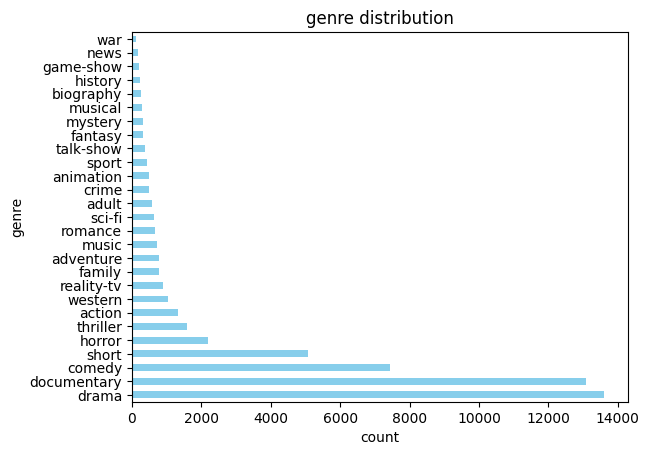

In [13]:
data.GENRE.value_counts().plot(kind='barh', color='skyblue')
plt.xlabel('count')
plt.ylabel('genre')
plt.title('genre distribution')
plt.show()

In [14]:
#count of genre
data['GENRE'].nunique()

27

In [15]:
data['year']=data['TITLE'].str.extract(r'(\d{4})')

In [16]:
data.head()

,TITLE,GENRE,DESCRIPTION,year
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,2009
1,Cupid (1997),thriller,A brother and sister with a past incestuous re...,1997
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,1980
3,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,1915
4,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,2007


In [18]:
#applying label encoder to convert categorical variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [19]:
data['GENRE_label']=label_encoder.fit_transform(data['GENRE'])


In [20]:
data.head()

,TITLE,GENRE,DESCRIPTION,year,GENRE_label
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,2009,8
1,Cupid (1997),thriller,A brother and sister with a past incestuous re...,1997,24
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,1980,1
3,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,1915,8
4,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,2007,8


In [21]:
data['year']=data['year'].astype(float)

In [22]:
# checking correletion of year with out target variable
data['GENRE_label'].corr(data['year'])

-0.010048735570682575

correlation is almost zero so we can drop this column

In [24]:
import re

In [25]:
def remove_year(title):
    return re.sub(r'\s*\(\d{4}\)', '', title)

In [26]:
# Apply the function to the 'TITLE' column
data['TITLE'] = data['TITLE'].apply(remove_year)

In [27]:
data

,TITLE,GENRE,DESCRIPTION,year,GENRE_label
0,Oscar et la dame rose,drama,Listening in to a conversation between his doc...,2009.0,8
1,Cupid,thriller,A brother and sister with a past incestuous re...,1997.0,24
2,"Young, Wild and Wonderful",adult,As the bus empties the students for their fiel...,1980.0,1
3,The Secret Sin,drama,To help their unemployed father make ends meet...,1915.0,8
4,The Unrecovered,drama,The film's title refers not only to the un-rec...,2007.0,8
...,...,...,...,...,...
108409,"""Tales of Light & Dark""",NaN,"Covering multiple genres, Tales of Light & Dar...",2013.0,27
108410,Der letzte Mohikaner,NaN,As Alice and Cora Munro attempt to find their ...,1965.0,27
108411,Oliver Twink,NaN,"A movie 169 years in the making. Oliver Twist,...",2007.0,27
108412,Slipstream,NaN,"Popular, but mysterious rock D.J Mike Mallard ...",1973.0,27


In [29]:
data['final']=data['TITLE']+data['DESCRIPTION']

In [30]:
data

,TITLE,GENRE,DESCRIPTION,year,GENRE_label,final
0,Oscar et la dame rose,drama,Listening in to a conversation between his doc...,2009.0,8,Oscar et la dame roseListening in to a convers...
1,Cupid,thriller,A brother and sister with a past incestuous re...,1997.0,24,CupidA brother and sister with a past incestuo...
2,"Young, Wild and Wonderful",adult,As the bus empties the students for their fiel...,1980.0,1,"Young, Wild and WonderfulAs the bus empties th..."
3,The Secret Sin,drama,To help their unemployed father make ends meet...,1915.0,8,The Secret SinTo help their unemployed father ...
4,The Unrecovered,drama,The film's title refers not only to the un-rec...,2007.0,8,The UnrecoveredThe film's title refers not onl...
...,...,...,...,...,...,...
108409,"""Tales of Light & Dark""",NaN,"Covering multiple genres, Tales of Light & Dar...",2013.0,27,"""Tales of Light & Dark""Covering multiple genre..."
108410,Der letzte Mohikaner,NaN,As Alice and Cora Munro attempt to find their ...,1965.0,27,Der letzte MohikanerAs Alice and Cora Munro at...
108411,Oliver Twink,NaN,"A movie 169 years in the making. Oliver Twist,...",2007.0,27,Oliver TwinkA movie 169 years in the making. O...
108412,Slipstream,NaN,"Popular, but mysterious rock D.J Mike Mallard ...",1973.0,27,"SlipstreamPopular, but mysterious rock D.J Mik..."


In [31]:
# using nltk to lean the data
from nltk import FreqDist
from nltk import word_tokenize
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
# cleaning the data removing unnecessary symbols, stopwords
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def remove_special_characters(text):
    pattern='[^a-zA-Z]' ## means anything which is not a-z, A-Z, 0-9
    text = re.sub(pattern= pattern, string= text, repl = " ").strip()
    text = re.sub(pattern = "\s{2,}", string=text, repl = " ")
    return text

def clean_data(text, custom_stopwords=None):
    custom_stopwords = ["would", "one", "tri",'think','got','make','even','way','could','and','still','are' ]
    text = remove_special_characters(text)
    final_stopwords = stopwords.words("english") if  custom_stopwords is None else stopwords.words("english") + custom_stopwords
    clean_text = ''
    for word in word_tokenize(text):
        if (word.lower() not in final_stopwords) and (len(word.lower())>2):
            clean_text = clean_text + PorterStemmer().stem(word) + " "
    return clean_text.lower().strip()

In [34]:
data['final']=data['final'].apply(remove_special_characters)

In [35]:
data['final']=data['final'].apply(clean_data)

In [37]:
data

,TITLE,GENRE,DESCRIPTION,year,GENRE_label,final
0,Oscar et la dame rose,drama,Listening in to a conversation between his doc...,2009.0,8,oscar dame roselisten convers doctor parent ye...
1,Cupid,thriller,A brother and sister with a past incestuous re...,1997.0,24,cupida brother sister past incestu relationshi...
2,"Young, Wild and Wonderful",adult,As the bus empties the students for their fiel...,1980.0,1,young wild wonderfula bu empti student field t...
3,The Secret Sin,drama,To help their unemployed father make ends meet...,1915.0,8,secret sinto help unemploy father end meet edi...
4,The Unrecovered,drama,The film's title refers not only to the un-rec...,2007.0,8,unrecoveredth film titl refer recov bodi groun...
...,...,...,...,...,...,...
108409,"""Tales of Light & Dark""",NaN,"Covering multiple genres, Tales of Light & Dar...",2013.0,27,tale light dark cover multipl genr tale light ...
108410,Der letzte Mohikaner,NaN,As Alice and Cora Munro attempt to find their ...,1965.0,27,der letzt mohikanera alic cora munro attempt f...
108411,Oliver Twink,NaN,"A movie 169 years in the making. Oliver Twist,...",2007.0,27,oliv twinka movi year make oliv twist art dodg...
108412,Slipstream,NaN,"Popular, but mysterious rock D.J Mike Mallard ...",1973.0,27,slipstreampopular mysteri rock mike mallard as...


In [38]:
data['clean']=data['final']

In [40]:
#df1 is the training data
#df2 is the testing data
df1 = data[data['GENRE'].notnull()]
df2 = data[data['GENRE'].isnull()]

In [42]:
df1.shape

(54214, 7)

In [43]:
#Since the dataset is very large, we will take a sample of it
df1=(df1.sample(frac=0.1, random_state=42))

In [74]:
df1.shape

(5421, 7)

In [75]:
# defining independent and target variables
X = df1["clean"]
y = df1["GENRE_label"]

In [76]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
#imbalanced classes so we need to use sampling (like SMOTE)
y_train.value_counts()

GENRE_label
8     936
7     871
5     504
21    317
13    139
24    105
18     83
0      77
26     61
14     54
2      50
20     49
19     49
9      45
3      44
1      40
6      36
22     33
23     26
10     21
4      18
16     18
15     15
12     12
11     11
17     11
25      7
Name: count, dtype: int64

In [78]:
import imblearn
smt=imblearn.over_sampling.SMOTE()

In [79]:
X_train

45252    path winda convict lee ferguson biggest desir ...
26239    ane eui aein eul mannadata han park kwang jung...
23947    dark side innocencea suburban housewif feel li...
39741    jerusalemin inaugur episod group young actor i...
38554    waterbornein lo angel author find tap water co...
                               ...                        
52038    heart stringsaft abandon mother adopt mclean l...
13247    die falsch brautfarm korbinian assbichl lot de...
51774    matatabifollow fluctuat fortun three friend fe...
46734    laurel avenu weekend life arnett famili event ...
53307    crimin non pensioneday flow calmli senior cent...
Name: clean, Length: 3632, dtype: object

In [80]:
# using tfidf it measures how important a term is within a document relative to a collection of documents
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [81]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [82]:
#Balancing the classes
train_X_new,train_y_new=smt.fit_resample(X_train_tfidf,y_train)

# Model Building

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
rf = RandomForestClassifier()
rf.fit(train_X_new,train_y_new)

RandomForestClassifier()

In [89]:
y_pred_test=rf.predict(X_test_tfidf)

In [90]:
accuracy_score(y_test, y_pred_test)

0.45667970933482394

# XGBoost

In [93]:
from xgboost import XGBClassifier

In [94]:
xgb_model = XGBClassifier()

In [95]:
xgb_model.fit(train_X_new,train_y_new)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [96]:
y_pred_test=xgb_model.predict(X_test_tfidf)

In [97]:
#testing
accuracy_score(y_test, y_pred_test)

0.47009502515371715

In [102]:
X_test_df2 = tfidf.transform(df2['clean'])

In [105]:
df2_genre_prediction=xgb_model.predict(X_test_df2)

In [106]:
df2_genre_prediction

array([ 8,  7,  7, ...,  8,  8, 21])

In [108]:
print(label_encoder.inverse_transform(df2_genre_prediction))

['drama' 'documentary' 'documentary' ... 'drama' 'drama' 'short']
